<a href="https://colab.research.google.com/github/JBKN/cat_dog/blob/main/Cat_v_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# New section

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:52<00:00, 22.0MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [12]:
 #generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
import tensorflow as tf

def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Fixed the cast and division operations
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 105ms/step - loss: 1.1326 - accuracy: 0.5835 - val_loss: 0.6356 - val_accuracy: 0.6358
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5731 - accuracy: 0.7050 - val_loss: 0.6302 - val_accuracy: 0.6370
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4738 - accuracy: 0.7769 - val_loss: 0.5731 - val_accuracy: 0.7158
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4033 - accuracy: 0.8171 - val_loss: 0.4721 - val_accuracy: 0.7814
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3301 - accuracy: 0.8536 - val_loss: 0.4293 - val_accuracy: 0.8108
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2657 - accuracy: 0.8855 - val_loss: 0.5977 - val_accuracy: 0.7292
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2017 - accuracy: 0.9178 - val_loss: 0.5901 - val_ac

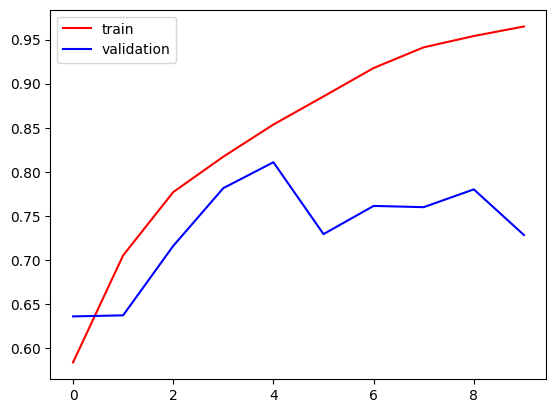

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

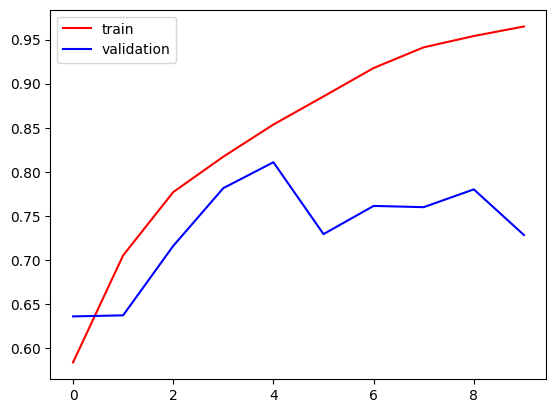

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

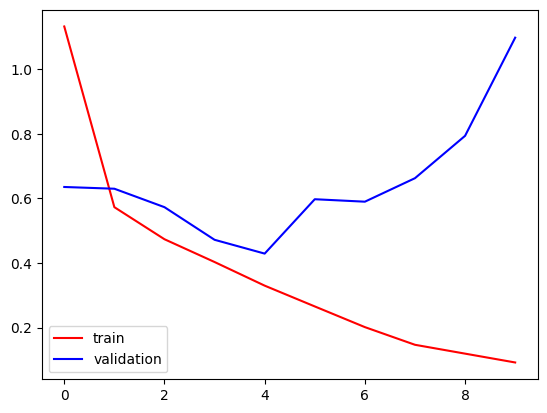

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

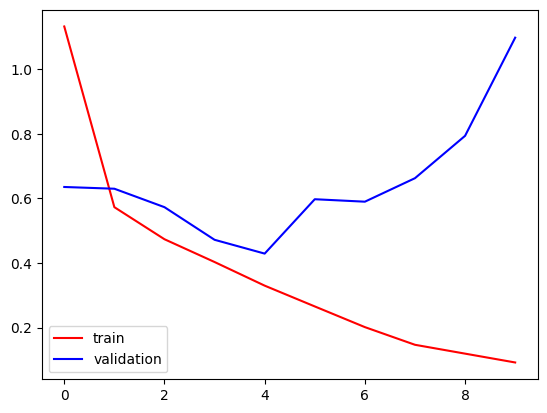

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/CAT.webp')

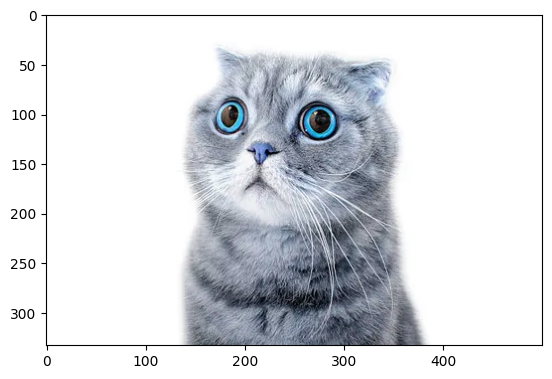

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(333, 500, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 389ms/step


array([[0.00024035]], dtype=float32)